<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/PARCIAL2/3Puntoparcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-11-09 01:39:26--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 142.250.1.139, 142.250.1.113, 142.250.1.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.1.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c43d8frig76lhq7a8jrfmtt330kt7pum/1699493925000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=73ea6415-cab6-40be-ab3b-71664b8fb4b8 [following]
--2023-11-09 01:39:26--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c43d8frig76lhq7a8jrfmtt330kt7pum/1699493925000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=73ea6415-cab6-40be-ab3b-71664b8fb4b8
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 173.194.195.132, 260

In [22]:
#Instalación de librerias a utilizar

import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
datos = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(datos)

In [23]:
#Obtencion de datos
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR',
           'IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases

Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333


In [24]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [25]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape},Ytest {Ytest.shape}")

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000),Ytest (360,)


In [28]:
#Cálculo de las transformadas rapidas de Fourier (FFT)
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #vector tiempo frecuencias para Xtrain
Xw = abs(np.fft.rfft(Xtrain)) # FFT de Xtrain

vf2 = np.fft.rfftfreq(Xtest.shape[1],1/Fs) #Vector tiempo frecuencias para Xtest
Xw2 = abs(np.fft.rfft(Xtest)) # FFT de Xtest

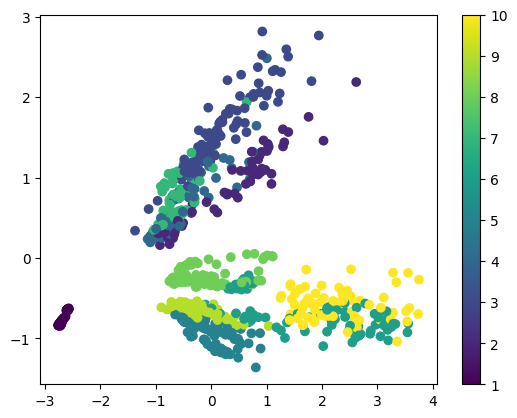

In [29]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T
#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

Graficas de la señal promedio de cada fallo en el tiempo.

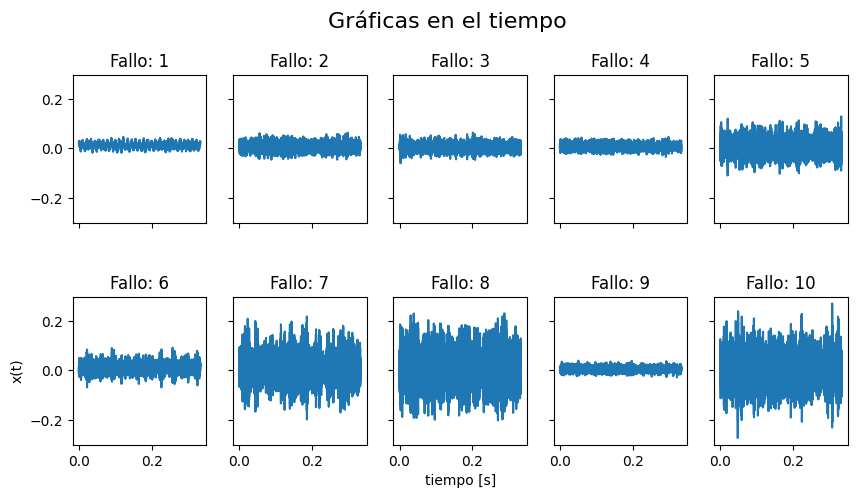

In [30]:
f = 2 #Numero de filas para el grafico
c = 5 #Numero de columnas en el gráfico

#Se utilizó la funcion axes para poder crear el grafico organizaodo en columnas y filas
fig, axes = plt.subplots(f,c, figsize=(10, 5), sharex=True, sharey=True)
#El ciclo permite calcular la señal promedio de cada clase en funcion del tiempo
vt = np.arange(0,Tl,1/Fs) #Vector que define el tiempo de la señal
for i in range(f):
    for j in range(c):
        clase = c * i + j + 1
        señal= Xtrain[Ytrain==clase]
        prom= np.mean(señal,axis=0)
        axes[i, j].plot(vt, prom)
        axes[i,j].set_title(f'Fallo: {clase}')

axes[1, 2].set_xlabel('tiempo [s]')
axes[1, 0].set_ylabel('x(t)')

plt.suptitle('Gráficas en el tiempo', fontsize=16)
plt.subplots_adjust(top=0.85, hspace=0.5)  #Ajustes para mejorar la disposición
plt.show()

Gráficas de la señal promedio en frecuencia para cada clase

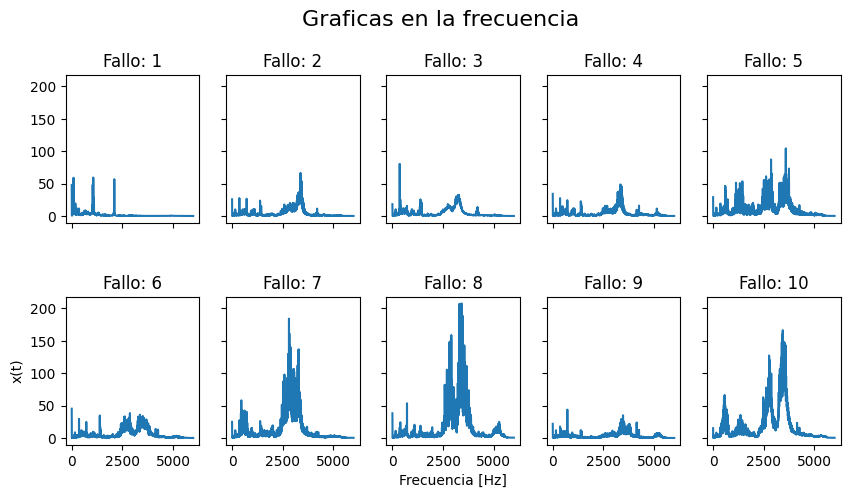

In [31]:
fig, axes = plt.subplots(f,c, figsize=(10, 5), sharex=True, sharey=True)

for i in range(f):
    for j in range(c):
        clase = c * i + j + 1
        señal= abs(Xw[Ytrain==clase])
        prom= np.mean(señal,axis=0)
        axes[i, j].plot(vf, prom)
        axes[i,j].set_title(f'Fallo: {clase}')

axes[1, 2].set_xlabel('Frecuencia [Hz]')
axes[1, 0].set_ylabel('x(t)')

plt.suptitle('Graficas en la frecuencia', fontsize=16)
plt.subplots_adjust(top=0.85, hspace=0.5)  #Ajustes para mejorar la disposición
plt.show()

Para la sección de predicción se compararon los espectros de ambos archivos, el archivo con los datos para hacer la comparacion (Xtrain) y el de prueba (Xtest) que son los datos que se quieren comparar y predecir para saber si los datos de (Xtest) efectivamente corresponden a fallos, luego se realizo una prueba para ver la precisión del calculo en base a Ytrain y Ytest. Para comprobar que efectivamente, es preciso hacer la comparacion de ambos conjuntos de datos.

In [38]:
from scipy.spatial.distance import cdist

Xw2t= sca_.fit_transform(Xw2.T).T #Calculo de Transpuesta

Dtr_te = cdist(Xw,Xw2t)
Dtr_te.shape #distancias espectros Xtrain vs Xtest

(840, 360)

In [39]:
#Encuentra los minimos (los valores más cercanos a cero) que resultan de la comparación de espectros
ind_ = np.argmin(Dtr_te,axis=0)
ind_.shape

(360,)

In [40]:
Ytestprb = Ytrain[ind_]  #Evalua las etiquetas de prueba (Ytrain) con las predichas (Ytest)

from sklearn.metrics import accuracy_score
print(f"ACC={accuracy_score(Ytest,Ytestprb)}") #Calcula la precisión de la predicción

ACC=0.5361111111111111


Se obtuvo el 0.5 de precisión lo que significa que al menos la mitad de los fallos predichos son incorrectos, para mejorar la predicción se puede intentar con una base de datos más amplia que permita hacer más comparaciones para llegar a una conclusión o haciendo uso de otras tecnicas sobre manipulacion y analisis de señales.


